<a href="https://colab.research.google.com/github/valerio-unifei/ECOP06/blob/main/ECOP06_12_Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  SciPy - Biblioteca Científica

SciPy é uma coleção de algoritmos matemáticos e funções de conveniência construídas na extensão NumPy do Python.

Ele adiciona poder significativo à sessão interativa do Python, fornecendo ao usuário comandos e classes de alto nível para manipular e visualizar dados.

Com o SciPy, uma sessão interativa do Python torna-se um ambiente de processamento de dados e prototipagem de sistemas que rivaliza com sistemas, como MATLAB, IDL, Octave, R-Lab e SciLab.

In [ ]:
import scipy
scipy.__version__

# Funções Especiais

A principal característica do scipy.specialpacote é a definição de inúmeras funções especiais da física matemática.

As funções disponíveis incluem airy, elliptic, bessel, gamma, beta, hypergeometric, parabolic cylinder, mathieu, spheroidal wave, struve, e kelvin.

## Funções de Bessel de ordem real

As funções de Bessel são uma família de soluções para a equação diferencial de Bessel com alfa de ordem real ou complexa.

Entre outros usos, essas funções surgem em problemas de propagação de ondas, como os modos vibracionais de uma pele fina de tambor.

Aqui está um exemplo de uma cabeça de tambor circular ancorada na borda:

In [ ]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

def drumhead_height(n, k, distance, angle, t):
   kth_zero = special.jn_zeros(n, k)[-1]
   result = np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)
   return result

theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]

x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_zlabel('Z')
plt.show()

# Integração

Fornece várias técnicas de integração, incluindo um integrador de equações diferenciais ordinárias.

## Integração geral

A função quad é fornecida para integrar uma função de uma variável entre dois pontos. Os pontos podem ser +/- inf para indicar limites infinitos.

Exemplo: Integrar uma função de bessel ao longo do intervalo \[0, 4.5\]:

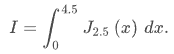

In [ ]:
import scipy.integrate as integrate
import scipy.special as special

resultado = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)
resultado

Valor real da integral acima:

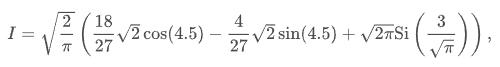

In [ ]:
from numpy import sqrt, sin, cos, pi
I = sqrt(2/pi)*(18.0/27*sqrt(2)*cos(4.5) - 4.0/27*sqrt(2)*sin(4.5) + sqrt(2*pi) * special.fresnel(3/sqrt(pi))[0])
I

Comparando os resultados:

In [ ]:
abs(resultado[0]-I)

Se a função a ser integrada receber parâmetros adicionais, eles poderão ser fornecidos no argumento *args*.

Suponha que a seguinte integral seja calculada:

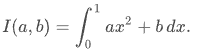

In [ ]:
from scipy.integrate import quad
def integrand(x, a, b):
  return a*x**2 + b

a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))
I

Entradas infinitas também são permitidas quadusando *inf* como um dos argumentos.

Por exemplo, suponha que um valor numérico para a integral exponencial:

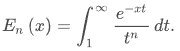

In [ ]:
from scipy.integrate import quad
import scipy.special as special

def integrand(t, n, x):
  return np.exp(-x*t) / t**n

def expint(n, x):
  return quad(integrand, 1, np.inf, args=(n, x))[0]

special.expn(3, np.arange(1.0,4.0,0.5))

## Integração múltipla geral

A mecânica para integração dupla e tripla foi incluída nas funções **dblquad** e **tplquad**.

Essas funções levam a função para integrar e quatro ou seis argumentos, respectivamente.

Os limites de todas as integrais internas precisam ser definidos como funções.

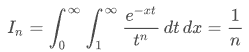

In [ ]:
from scipy import integrate

N = 5
def f(t, x):
  return np.exp(-x*t) / t**N

integrate.nquad(f, [[1, np.inf],[0, np.inf]])

In [ ]:
from scipy import integrate

def f(x, y):
    return x*y

def bounds_y():
    return [0, 0.5]

def bounds_x(y):
    return [0, 1-2*y]

integrate.nquad(f, [bounds_x, bounds_y])

## Integrando usando Samples

Se as amostras estiverem igualmente espaçadas e o número de amostras disponíveis para '2\*\*k + 1' para algum inteiro k, então a integração de Romberg **romb** pode ser usada para obter estimativas de alta precisão da integral usando as amostras disponíveis.

In [ ]:
import numpy as np
from scipy import integrate

def f1(x):
   return x**2

def f2(x):
   return x**3

x = np.array([1,3,4])

y1 = f1(x)
I1 = integrate.simpson(y1, x)
print('I1 =',I1)

y2 = f2(x)
I2 = integrate.simpson(y2, x)
print('I2 =',I2)

# Otimização

Buscar a minização da função:

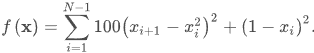

O valor mínimo é conhecido = 0 quando aplicado um vetor X com valores 1.

In [ ]:
import numpy as np
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

res.x

## Otimização Global

Função teste:

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def eggholder(x):
  return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
    -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

Otimizando função EggHolder:

In [ ]:
from scipy import optimize

limites = [(-512, 512), (-512, 512)]

optimize.shgo(eggholder, limites)

In [ ]:
optimize.dual_annealing(eggholder, limites)

In [ ]:
optimize.differential_evolution(eggholder, limites)

In [ ]:
optimize.shgo(eggholder, limites, n=200, iters=5, sampling_method='sobol')

## Minimização de mínimos quadrados

In [ ]:
from scipy.optimize import least_squares

def model(x, u):
  return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

def fun(x, u, y):
  return model(x, u) - y

def jac(x, u, y):
  J = np.empty((u.size, x.size))
  den = u ** 2 + x[2] * u + x[3]
  num = u ** 2 + x[1] * u
  J[:, 0] = num / den
  J[:, 1] = x[0] * u / den
  J[:, 2] = -x[0] * num * u / den ** 2
  J[:, 3] = -x[0] * num / den ** 2
  return J

u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1, 8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2, 4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
x0 = np.array([2.5, 3.9, 4.15, 3.9])
res = least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)
res.x

In [ ]:
import matplotlib.pyplot as plt
u_test = np.linspace(0, 5)
y_test = model(res.x, u_test)
plt.plot(u, y, 'o', markersize=4, label='dados reais')
plt.plot(u_test, y_test, label='dados do modelo')
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()

# Interpolação

## Interpolação 1-Dimensão

In [ ]:
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=41, endpoint=True)

import matplotlib.pyplot as plt

plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['original', 'linear', 'cúbica'], loc='best')
plt.show()

In [ ]:
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f1 = interp1d(x, y, kind='nearest')
f2 = interp1d(x, y, kind='previous')
f3 = interp1d(x, y, kind='next')

xnew = np.linspace(0, 10, num=1001, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')
plt.plot(xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
plt.legend(['original', 'nearest', 'previous', 'next'], loc='best')
plt.show()

## Interpolação Multivariada

In [ ]:
from scipy.interpolate import griddata

def func(x, y):
  return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

## Interpolação Multivariada em Grade

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

def F(u, v):
  return u * np.cos(u * v) + v * np.sin(u * v)

fit_points = [np.linspace(0, 3, 8), np.linspace(0, 3, 8)]
values = F(*np.meshgrid(*fit_points, indexing='ij'))

ut, vt = np.meshgrid(np.linspace(0, 3, 80), np.linspace(0, 3, 80), indexing='ij')
true_values = F(ut, vt)
test_points = np.array([ut.ravel(), vt.ravel()]).T

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes = axes.ravel()
fig_index = 0

for method in ['linear', 'nearest']:
  interp = RegularGridInterpolator(fit_points, values)
  im = interp(test_points, method=method).reshape(80, 80)
  axes[fig_index].imshow(im)
  axes[fig_index].set_title(method)
  axes[fig_index].axis("off")
  fig_index += 1

fig.tight_layout()
fig.show()

# Transformadas Rápidas de Fourier (FFT)

## TF Discretas 1-Dimensão

In [ ]:
from scipy.fft import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y

In [ ]:
from scipy.fft import fft, fftfreq

# Number of sample points
N = 600

# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [ ]:
plt.plot(x,y)
plt.grid()
plt.show()

## FFT Discreta Multidimensional

In [ ]:
from scipy.fft import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm

N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))

xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)

ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)

ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)

xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)

ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()

## Transformadas Discretas de Cosseno

In [ ]:
from scipy.fft import dct, idct
import matplotlib.pyplot as plt

N = 100
t = np.linspace(0,20,N, endpoint=False)
x = np.exp(-t/3)*np.cos(2*t)

y = dct(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')

window = np.zeros(N)
window[:15] = 1
yr = idct(y*window, norm='ortho')
plt.plot(t, yr, 'g+')

plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.grid()
plt.show()

# Dados Espaciais

## Estruturas Convexas

In [ ]:
from scipy.spatial import ConvexHull
rng = np.random.default_rng()
points = rng.random((30, 2))   # 30 random points in 2-D
hull = ConvexHull(points)

import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex,0], points[simplex,1], 'k-')
plt.show()

## Divisão de Espaço Vizinho

In [ ]:
from scipy.spatial import KDTree
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])
tree = KDTree(points)
tree.query([0.1, 0.1])

x = np.linspace(-0.5, 2.5, 31)
y = np.linspace(-0.5, 2.5, 33)
xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]

import matplotlib.pyplot as plt
dx_half, dy_half = np.diff(x[:2])[0] / 2., np.diff(y[:2])[0] / 2.
x_edges = np.concatenate((x - dx_half, [x[-1] + dx_half]))
y_edges = np.concatenate((y - dy_half, [y[-1] + dy_half]))
plt.pcolormesh(x_edges, y_edges, tree.query(xy)[1].reshape(33, 31), shading='flat')
plt.plot(points[:,0], points[:,1], 'ko')
plt.show()

In [ ]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

def mandala(n_iter, n_points, radius):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111)
  ax.set_axis_off()
  ax.set_aspect('equal', adjustable='box')

  angles = np.linspace(0, 2*np.pi * (1 - 1/n_points), num=n_points) + np.pi/2
  xy = np.array([[0, 0]])
  for k in range(n_iter):
    t1 = np.array([])
    t2 = np.array([])
    for i in range(xy.shape[0]):
      t1 = np.append(t1, xy[i, 0] + radius**k * np.cos(angles))
      t2 = np.append(t2, xy[i, 1] + radius**k * np.sin(angles))
    xy = np.column_stack((t1, t2))

  spatial.voronoi_plot_2d(spatial.Voronoi(xy), ax=ax)
  return fig

n_iter = 3
n_points = 6
radius = 4

fig = mandala(n_iter, n_points, radius)
plt.show()

# Atividades

## Otimização

Encontre o valor mínimo da função abaixo com o método 'Nelder Mead':

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show()

In [ ]:
from scipy import optimize

xi = [10]
optimize.minimize(f,xi)

## Análise de Sinal

Sinal Chirp

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

matr = int(input('Forneça sua matrícula: '))
np.random.seed(matr)

time_step = .01
time_vec = np.arange(0, 70, time_step)

# gerador de sinal chirp (sinal no qual a frequência aumenta ou diminui com o tempo)
sig = np.sin(0.5 * np.pi * time_vec * (1 + .1 * time_vec))

plt.figure(figsize=(8, 5))
plt.plot(time_vec, sig)
plt.show()

Extraia o Espectrograma do sinal Chirp

In [ ]:
from scipy.signal import spectrogram

frequencias, tempo, espectrograma = spectrogram(time_vec,fs=sig)

plt.figure(figsize=(8, 5))
plt.imshow(espectrograma, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Espectrograma')
plt.ylabel('faixa de frequencia')
plt.xlabel('Janela de tempo')
plt.tight_layout()
plt.show()

Traçar o PSD (Densidade Espectral de Potência):

In [ ]:
from scipy.signal import welch

freqs, psd = welch()

plt.figure(figsize=(8, 5))
plt.semilogx(freqs, psd)
plt.title('PSD')
plt.xlabel('Frequencia')
plt.ylabel('Potência')
plt.tight_layout()
plt.show()

## Aproximação de Funções

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(matr)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data)
plt.show()

In [ ]:
from scipy.optimize import curve_fit

def func_aprox(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = curve_fit(func_aprox,x_data,y_data)


plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label='Dados')
plt.plot(x_data, func_aprox(x_data, params[0], params[1]), label='Função ajustada')
plt.legend(loc='best')
plt.show()